In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

#Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample()

,v1,v2
112,ham,I'm ok wif it cos i like 2 try new things. But...


In [8]:
df.rename(columns = {'v1':'target','v2':'text'})

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['v1'] = encoder.fit_transform(df['v1'])

In [12]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep= 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

#eda

In [18]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

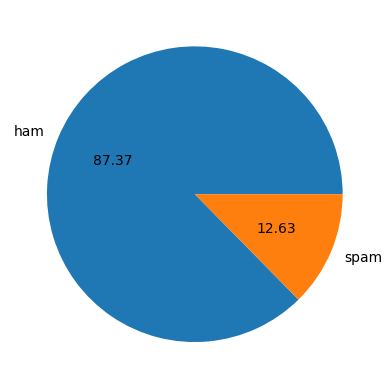

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['v2'].apply(len)

C:\Users\admin\AppData\Local\Temp\ipykernel_7996\4087835347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['v2'].apply(len)


In [25]:
df.head()

,v1,v2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df['num_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\admin\AppData\Local\Temp\ipykernel_7996\455515965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,v1,v2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['num_words'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\admin\AppData\Local\Temp\ipykernel_7996\1315849543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['num_words'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df.head()

,v1,v2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,1.965564
std,58.236293,1.448541,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [32]:
#ham messages
df[df['v1'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,1.820195
std,56.358207,1.383657,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [33]:
#sham message
df[df['v1'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,2.970904
std,30.137753,1.488425,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,2.000000,2.000000
50%,149.000000,3.000000,3.000000
75%,157.000000,4.000000,4.000000
max,224.000000,9.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

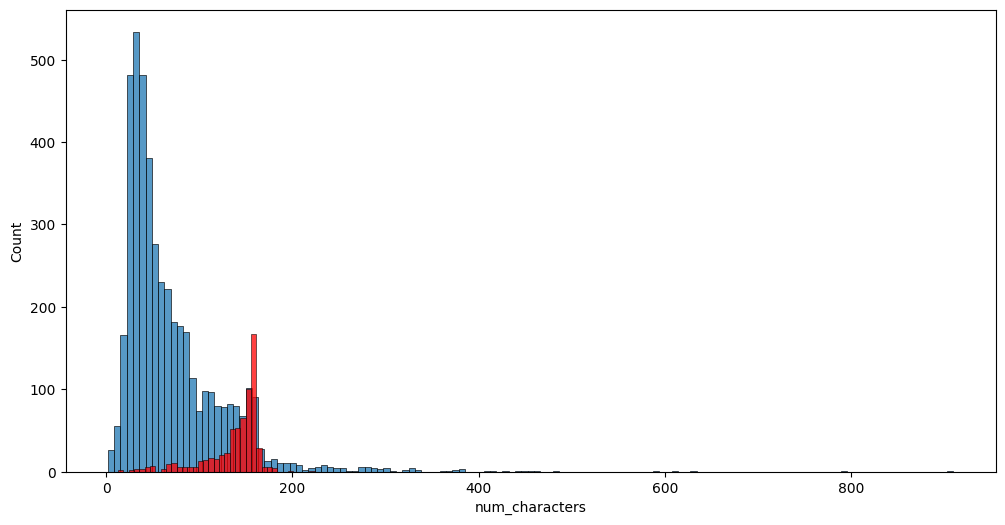

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1'] == 0]['num_characters'])
sns.histplot(df[df['v1'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

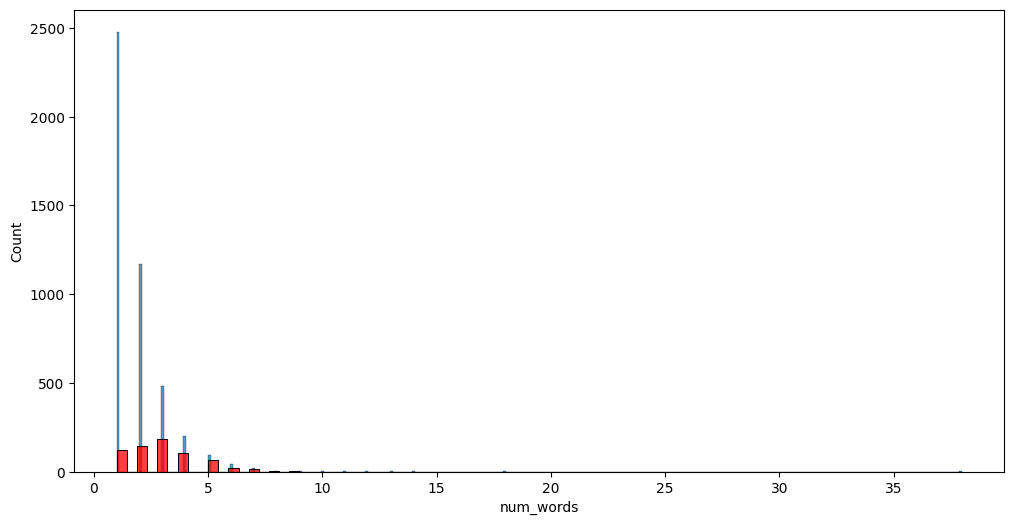

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1'] == 0]['num_words'])
sns.histplot(df[df['v1'] == 1]['num_words'],color = 'red')

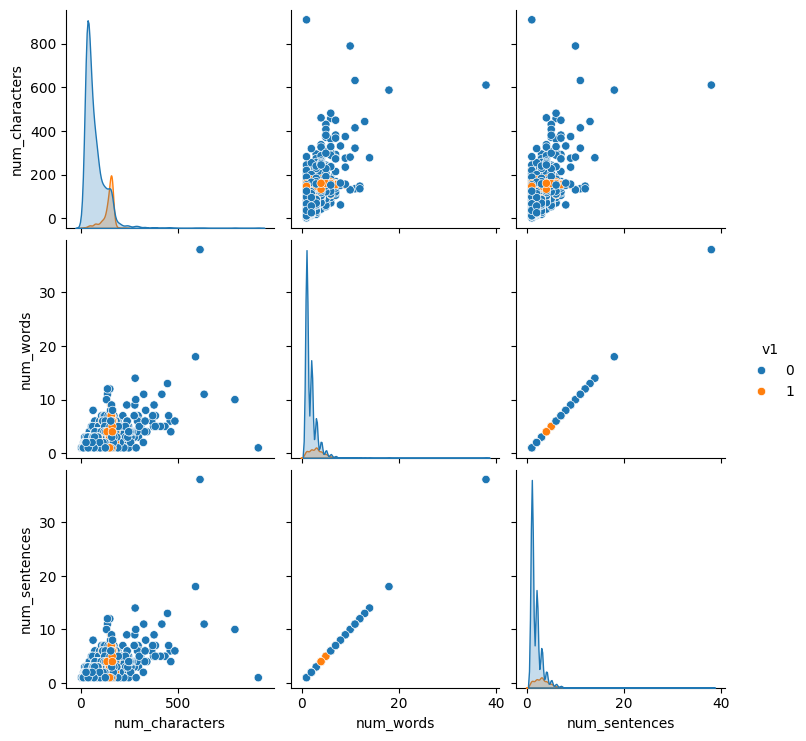

In [37]:
sns.pairplot(df,hue = 'v1')

#Data Preprocessing

In [50]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)



    text = y[:]
    y.clear()

    for i in  text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)



    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return   " ".join(y)

In [49]:
transform_text('Hi how are you?')

'hi'

In [ ]:
df['v2'][10]

In [43]:
 import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [51]:
df['transformed_text'] = df['v2'].apply(transform_text)

C:\Users\admin\AppData\Local\Temp\ipykernel_7996\144072681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['v2'].apply(transform_text)


In [52]:
df.head()

,v1,v2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [57]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [58]:
spam_wc = wc.generate(df[df['v1'] == 1]['transformed_text'].str.cat(sep=" "))

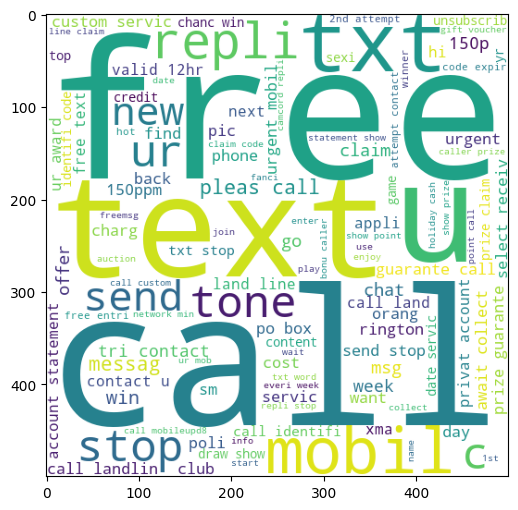

In [62]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [63]:
ham_wc = wc.generate(df[df['v1'] == 0]['transformed_text'].str.cat(sep=" "))

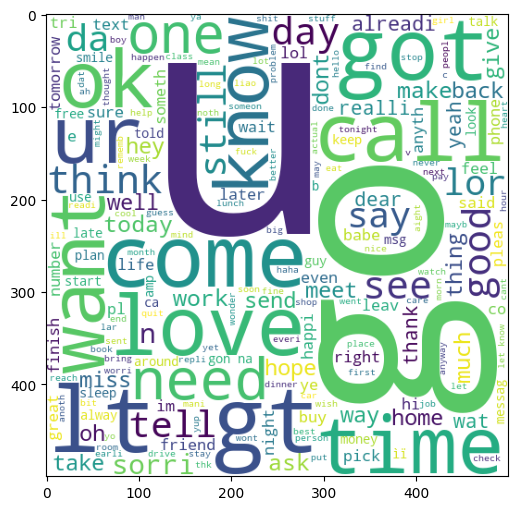

In [64]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [65]:
df.head()

,v1,v2,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [74]:
spam_corpus = []
for msg in df[df['v1'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [76]:
len(spam_corpus)

9939

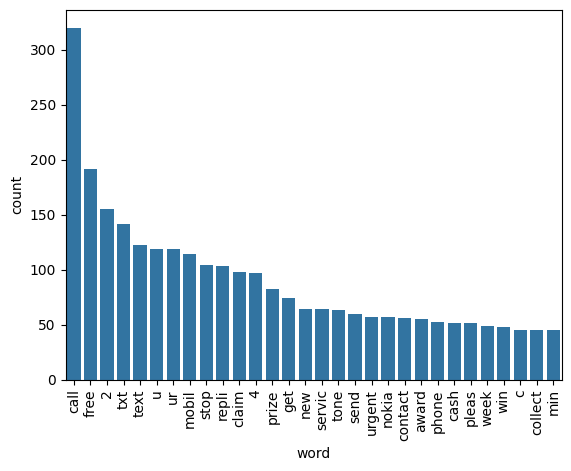

In [86]:
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
ham_corpus = []
for msg in df[df['v1'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [89]:
len(ham_corpus)

35404

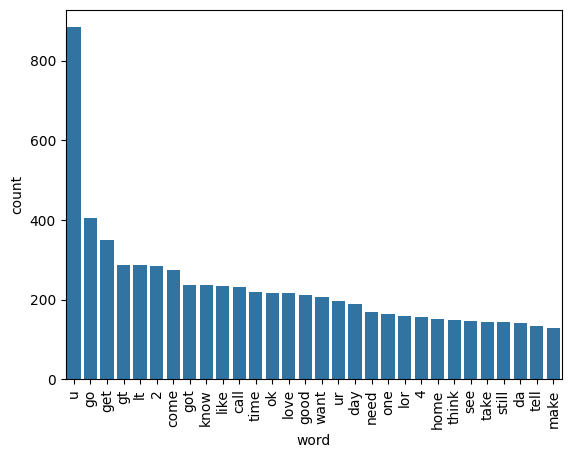

In [90]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [173]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [174]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [175]:
x.shape

(5169, 3000)

In [172]:
# x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [176]:
y = df['v1'].values

In [148]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [177]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [180]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [181]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [182]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [183]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [184]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [123]:
# tfidf ++> mnb

In [185]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))